In [1]:
print ("hola mundo"
       )

hola mundo


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df0 = pd.read_csv('customer_shopping_data.csv')
df0.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
df0.shape

(99457, 10)

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
print ("cantidad facturas:", df0["invoice_no"].nunique())

cantidad facturas: 99457


In [7]:
print ("cantidad de clientes:", df0["customer_id"].nunique())

cantidad de clientes: 99457


In [8]:
#valores unicos del atributo
print ("valores unicos en gender:", df0['gender'].unique())



#numero de valores diferentes del atributo
print ("numero de valores unicos:", df0['gender'].nunique())

valores unicos en gender: ['Female' 'Male']
numero de valores unicos: 2


In [9]:
#valores unicos del atributo
print ("valores unicos en payment_method:", df0['payment_method'].unique())



#numero de valores deiferentes del atributo
print ("numero de valores unicos:", df0['payment_method'].nunique())

valores unicos en payment_method: ['Credit Card' 'Debit Card' 'Cash']
numero de valores unicos: 3


In [10]:
df1= df0.copy()

In [11]:
# convertir el "invoice date" en fecha

df1["invoice_date"] = pd.to_datetime(df1["invoice_date"], dayfirst=True)

In [12]:
df1["invoice_date"].head(3)

0   2022-08-05
1   2021-12-12
2   2021-11-09
Name: invoice_date, dtype: datetime64[ns]

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [14]:
#agregar columnas para meses y años
df1["year"]= df1["invoice_date"].dt.strftime("%Y")

In [15]:
df1.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021


In [16]:
#agregar columnas para meses
df1["month"]= df1["invoice_date"].dt.month

In [17]:
df1.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11


In [18]:
columns_name= df1.columns.to_list()
print (columns_name)

['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall', 'year', 'month']


In [19]:
columns_name2= ['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'year', "month", 'shopping_mall']

In [20]:
# df1 con los atributos ordenados

df1_2= df1[columns_name2]



In [21]:
df1_2. head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon


In [22]:
df2= df1_2.copy()

In [23]:
df2.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity


In [24]:
#Funcion para definir categoria de edades 

def category_f (age):
    if (age>= 18) and (age<25):
        return "18-24"
    elif (age>=25) and (age<35):
        return "25-34"
    elif (age>=35) and (age<50):
        return "35-49"
    elif (age>=50) and (age<65):
        return "50-64"
    else:
        return "65..."
    


In [25]:
df2["age_cat"] = df2["age"].apply(category_f)

In [26]:
df2.head(4)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65...


In [27]:
df2[["age", "age_cat"]].head(3)

,age,age_cat
0,28,25-34
1,21,18-24
2,20,18-24


In [28]:
df2[["age", "age_cat"]].tail(5)

,age,age_cat
99452,45,35-49
99453,27,25-34
99454,63,50-64
99455,56,50-64
99456,36,35-49


1. Como es la relacion de genero y numero de transacciones


[Text(0.5, 1.0, 'relacion de genero y nro de transacciones')]

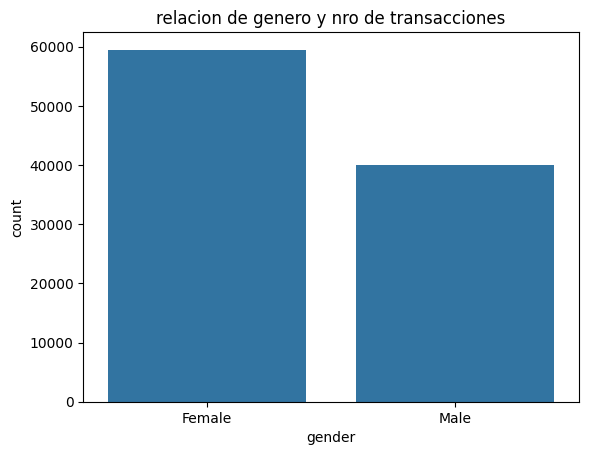

In [29]:
#histograma cantidad transacciones por genero
sns.countplot(data=df1, x="gender").set(title="relacion de genero y nro de transacciones")

In [30]:
#cantidad de elementos por categoria

gender_quantity = df1 ["gender"].value_counts()
print (gender_quantity)


gender
Female    59482
Male      39975
Name: count, dtype: int64


In [31]:
#reseterar el indice y trabajar con un df... lo combierte en data frame
df_gender = df1 ["gender"].value_counts().reset_index()
print (df_gender)
df_gender.shape

   gender  count
0  Female  59482
1    Male  39975


(2, 2)

Text(0.5, 1.0, 'Relacion de transacciones entre mujeres y hombres')

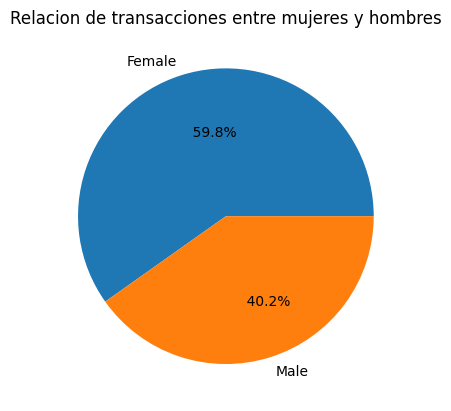

In [32]:

plt.pie(gender_quantity, labels=gender_quantity.index, autopct="%11.1f%%")
plt.title("Relacion de transacciones entre mujeres y hombres")

######.2 Como es la distribución de edades por número de transacciones"


In [33]:
df2.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24


In [34]:
df2["age"].describe()


count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

[Text(0.5, 1.0, 'Edades por Transacción')]

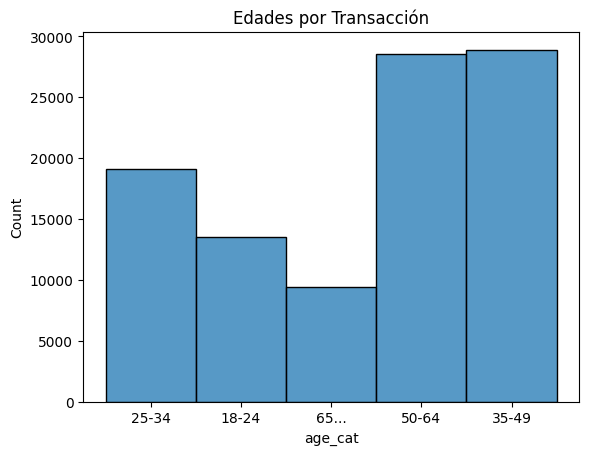

In [35]:
## Histograma
sns.histplot(data=df2, x="age_cat").set(title="Edades por Transacción")

In [36]:
age_quantity = df2 ["age_cat"].value_counts()
print (age_quantity)


age_cat
35-49    28906
50-64    28547
25-34    19081
18-24    13496
65...     9427
Name: count, dtype: int64


Text(0.5, 1.0, 'Relacion de transacciones y categoría de edades')

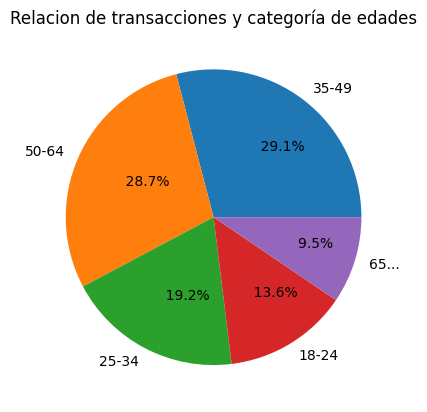

In [37]:
plt.pie(age_quantity, labels=age_quantity.index, autopct="%11.1f%%")
plt.title("Relacion de transacciones y categoría de edades")

###.3 ¿Qué grupo de edad gastó más dinero?

In [38]:
#df nueva

df3= df2.copy()

In [39]:
df3.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65...
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,50-64


In [40]:
df3["total"]= df3 ["quantity"]* df3["price"]

In [41]:
df3.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65...,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,50-64,242.40


In [42]:
df3 [["quantity", "price", "total"]].head(5)

,quantity,price,total
0,5,1500.40,7502.00
1,3,1800.51,5401.53
2,1,300.08,300.08
3,5,3000.85,15004.25
4,4,60.60,242.40


In [43]:
df_age_total= df3.groupby("age_cat")["total"].sum()
print(df_age_total)

age_cat
18-24    33454083.87
25-34    47805115.52
35-49    74358776.99
50-64    71961241.44
65...    23926576.43
Name: total, dtype: float64


In [44]:
df_age_total= df3.groupby("age_cat")["total"].sum().sort_values(ascending=False).reset_index()
df_age_total.head

<bound method NDFrame.head of   age_cat        total
0   35-49  74358776.99
1   50-64  71961241.44
2   25-34  47805115.52
3   18-24  33454083.87
4   65...  23926576.43>

<Axes: >

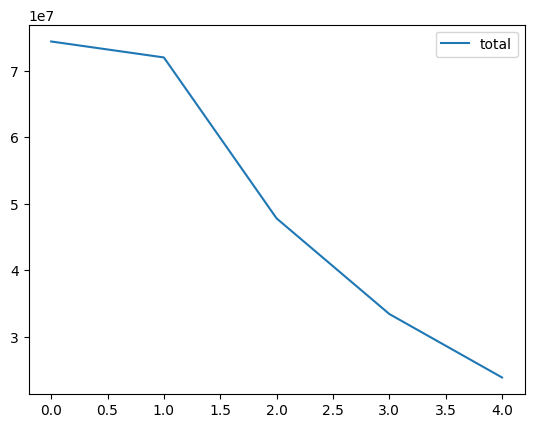

In [45]:
df_age_total.plot()

C:\Users\CarmenLu\AppData\Local\Temp\ipykernel_12912\946901423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="age_cat", y="total", data=df_age_total, palette="pastel")


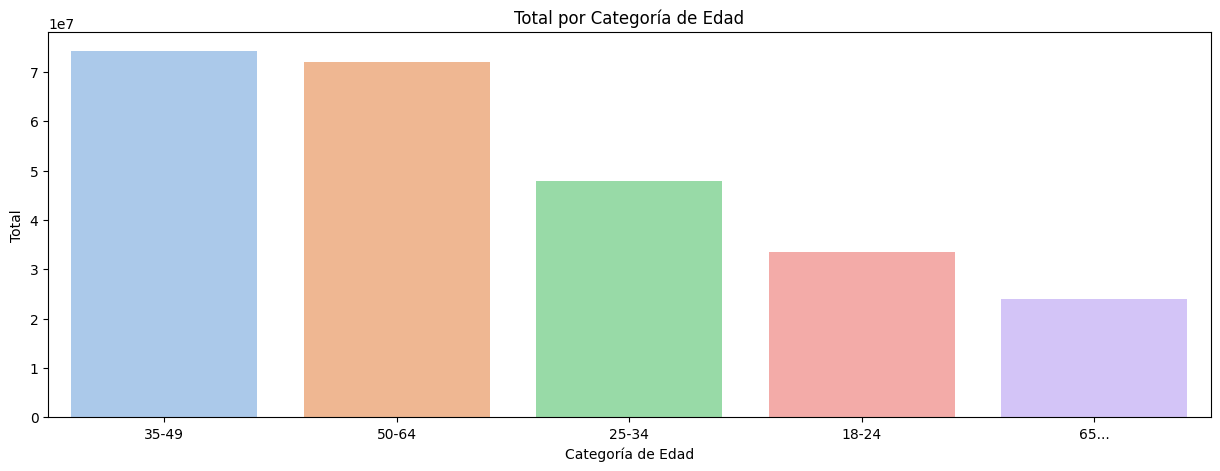

In [46]:
#grafica por categoria
plt.figure (figsize=(15,5))
sns.barplot(x="age_cat", y="total", data=df_age_total, palette="pastel")
plt.title("Total por Categoría de Edad")
plt.xlabel("Categoría de Edad")
plt.ylabel("Total")
plt.show()

###revisar en casa

####.4 Comprobar la distribución por edades entre hombres y mujeres



# Agrupar por género y rango de edad, contando la cantidad
conteo_por_grupo = df.groupby(['genero', 'rango_edad']).size().reset_index(name='cantidad')

# Crear un gráfico de barras
conteo_por_grupo.pivot(index='rango_edad', columns='genero', values='cantidad').plot(kind='bar')
plt.title('Distribución por Edad y Género')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.show()

In [47]:
df3.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65...,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,50-64,242.40


In [48]:
# Agrupar por género y rango de edad, contando la cantidad

df_conteo_por_grupo = df2.groupby(['gender', 'age_cat']).size().sort_values(ascending=False).reset_index(name='cantidad')

df_conteo_por_grupo

###debo hacer el ejercicio con los totales

,gender,age_cat,cantidad
0,Female,35-49,17355
1,Female,50-64,17080
2,Male,35-49,11551
3,Female,25-34,11474
4,Male,50-64,11467
5,Female,18-24,7938
6,Male,25-34,7607
7,Female,65...,5635
8,Male,18-24,5558
9,Male,65...,3792


In [49]:
df_conteo_por_grupo_total= df3.groupby(['gender', 'age_cat'])['total'].sum().sort_values(ascending=False).reset_index(name='Total')
df_conteo_por_grupo_total

,gender,age_cat,Total
0,Female,35-49,44244395.29
1,Female,50-64,43144077.33
2,Male,35-49,30114381.70
3,Male,50-64,28817164.11
4,Female,25-34,28532699.19
5,Female,18-24,20285122.34
6,Male,25-34,19272416.33
7,Female,65...,14000841.87
8,Male,18-24,13168961.53
9,Male,65...,9925734.56


In [50]:
df_conteo_por_grupo.head(10)

,gender,age_cat,cantidad
0,Female,35-49,17355
1,Female,50-64,17080
2,Male,35-49,11551
3,Female,25-34,11474
4,Male,50-64,11467
5,Female,18-24,7938
6,Male,25-34,7607
7,Female,65...,5635
8,Male,18-24,5558
9,Male,65...,3792


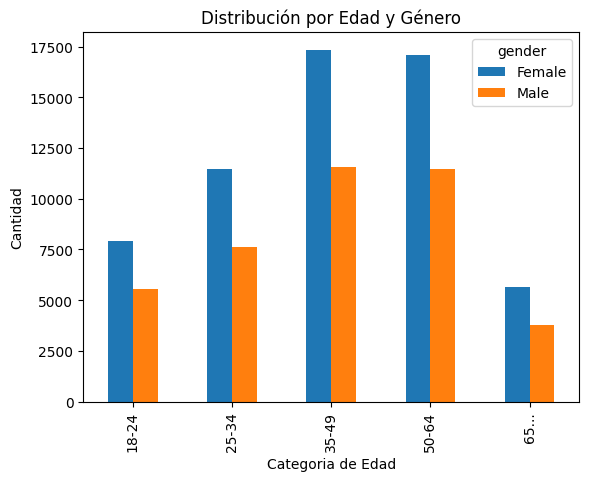

In [51]:
# Crear un gráfico de barras
df_conteo_por_grupo.pivot(index='age_cat', columns='gender', values='cantidad').plot(kind='bar')
plt.title('Distribución por Edad y Género')
plt.xlabel('Categoria de Edad')
plt.ylabel('Cantidad')
plt.show()


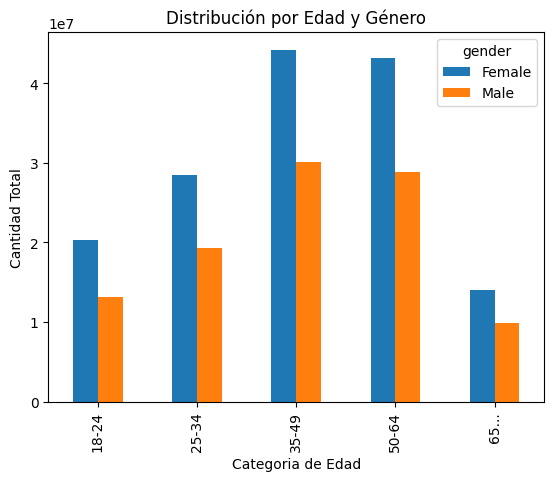

In [52]:
# Crear un gráfico de barras para los totales
df_conteo_por_grupo_total.pivot(index='age_cat', columns='gender', values='Total').plot(kind='bar')
plt.title('Distribución por Edad y Género')
plt.xlabel('Categoria de Edad')
plt.ylabel('Cantidad Total')
plt.show()


.5 Forma de pago y número de transacciones

In [53]:
df2.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65...
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,50-64


In [54]:
# Agrupar por forma de pago y contar las transacciones
conteo_formas_pago = df2.groupby('payment_method').size().sort_values(ascending=False).reset_index(name='Total_met_pago')
conteo_formas_pago

,payment_method,Total_met_pago
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


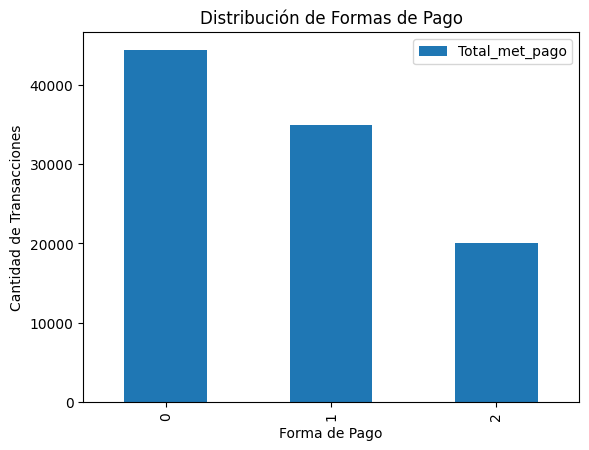

In [55]:
# Crear un gráfico de barras
conteo_formas_pago.plot(kind='bar')
plt.title('Distribución de Formas de Pago')
plt.xlabel('Forma de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.show()

####- .6 Relacion entre la cantidad de dinero gastada y el método de pago

In [56]:
df3.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65...,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,50-64,242.40


In [57]:
# Agrupamos los datos por método de pago y sumamos las cantidades gastadas
price_paymethod = df3.groupby('payment_method')['total'].sum()/1000000#DIVIDIR POR 1 MILLON PARA EXPRESAR EN MILLONES

# Imprimimos el resultado
print(price_paymethod)

payment_method
Cash           112.832243
Credit Card     88.077124
Debit Card      50.596427
Name: total, dtype: float64


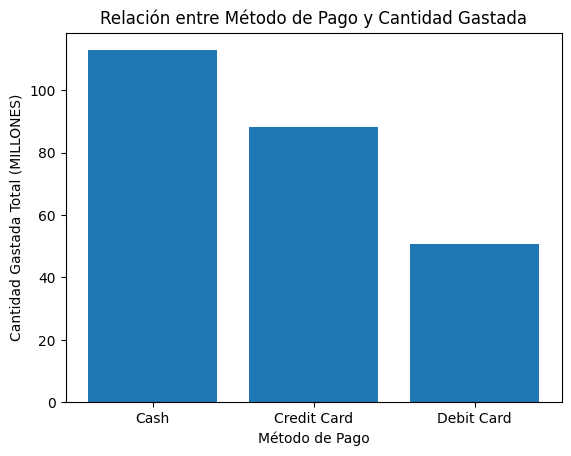

In [58]:

# Create a bar chart
plt.bar(price_paymethod.index, price_paymethod.values)
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad Gastada Total (MILLONES)")
plt.title("Relación entre Método de Pago y Cantidad Gastada")
plt.show()

.7 Investigar qué precios de productos suelen preferir los clientes

In [59]:
df3.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65...,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,50-64,242.40


In [60]:
# Estadísticas descriptivas de la columna precio

print(df3['price'].describe())


count    99457.000000
mean       689.256321
std        941.184567
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64


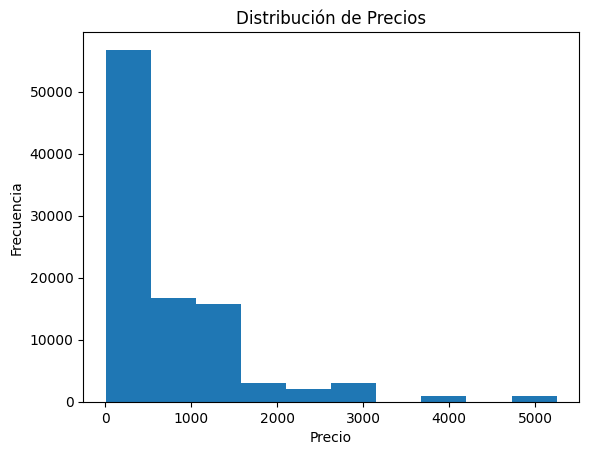

In [61]:
# Visualización
plt.hist(df1['price'], bins=10)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios')
plt.show()




####.8 Descubre las categorías populares

In [62]:
df3.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65...,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,50-64,242.40


In [63]:
#valores unicos del atributo
print ("valores unicos en category:", df3['category'].unique())



#numero de valores diferentes del atributo
print ("numero de valores unicos:", df3['category'].nunique())

valores unicos en category: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
numero de valores unicos: 8


In [64]:
# Agrupar por categoría y calcular la suma de las ventas
ventas_por_categoria = (df3.groupby('category')['total'].sum()/1000000).sort_values(ascending=False).reset_index()




In [65]:
ventas_por_categoria. head(8)

,category,total
0,Clothing,113.996791
1,Shoes,66.553451
2,Technology,57.862350
3,Cosmetics,6.792863
4,Toys,3.980426
5,Food & Beverage,0.849535
6,Books,0.834553
7,Souvenir,0.635825


In [66]:
# Seleccionar las 3 categorías más populares
top_3_categorias = ventas_por_categoria.head(3)

print("Las 3 categorías más populares son:")
print(top_3_categorias)



Las 3 categorías más populares son:
     category       total
0    Clothing  113.996791
1       Shoes   66.553451
2  Technology   57.862350


.9 Categorías populares por número de transacciones y monto total gastado

In [67]:
df4= df3.copy()

In [68]:
df4.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65...,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,50-64,242.40


In [69]:

# Agrupamos el DataFrame por la columna 'categoria' y calculamos la suma
df_agrupado = (df4.groupby('category').agg({'total': 'sum'})/1000000).reset_index()

df_agrupado

,category,total
0,Books,0.834553
1,Clothing,113.996791
2,Cosmetics,6.792863
3,Food & Beverage,0.849535
4,Shoes,66.553451
5,Souvenir,0.635825
6,Technology,57.862350
7,Toys,3.980426


In [70]:

# Contamos el número de veces que aparece cada categoría
conteo_categorias = df4['category'].value_counts().reset_index()
conteo_categorias


,category,count
0,Clothing,34487
1,Cosmetics,15097
2,Food & Beverage,14776
3,Toys,10087
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
7,Books,4981


In [71]:
df_merged=pd.merge(conteo_categorias, df_agrupado, on='category').sort_values("total", ascending=False)

df_merged

,category,count,total
0,Clothing,34487,113.996791
4,Shoes,10034,66.553451
6,Technology,4996,57.862350
1,Cosmetics,15097,6.792863
3,Toys,10087,3.980426
2,Food & Beverage,14776,0.849535
7,Books,4981,0.834553
5,Souvenir,4999,0.635825


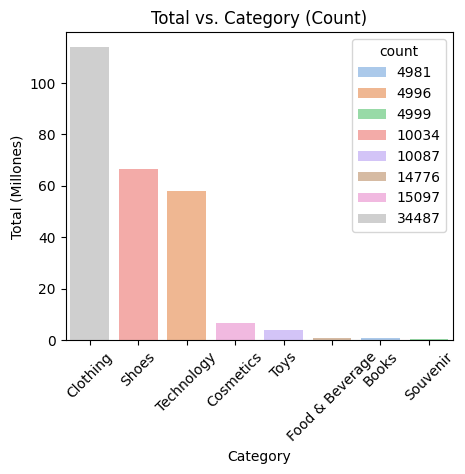

In [72]:
#Create a bar chart
plt.figure(figsize=(5, 4))
sns.barplot(x="category", y="total", hue="count", data=df_merged, palette= "pastel")
plt.title("Total vs. Category (Count)")
# Inclinar las etiquetas del eje x 45 grados
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Total (Millones)")
plt.show()

#####10 ¿Cuál es el precio promedio por categoría?

In [73]:
# Calculate average price per category
average_price_per_category = df4.groupby('category')['price'].mean().sort_values(ascending=False)


print(average_price_per_category)

category
Technology         3156.935548
Shoes              1807.388568
Clothing            901.084021
Cosmetics           122.448626
Toys                107.733185
Books                45.568621
Souvenir             34.894345
Food & Beverage      15.671948
Name: price, dtype: float64


In [74]:
#verificando los promedios

# Filter data for the chosen category
category_data = df4[df4['category'] == "Souvenir"]



In [75]:
# Calculate average price for the category
average_price = category_data['price'].mean()

# Print the average price
print(average_price)

34.894344868973796


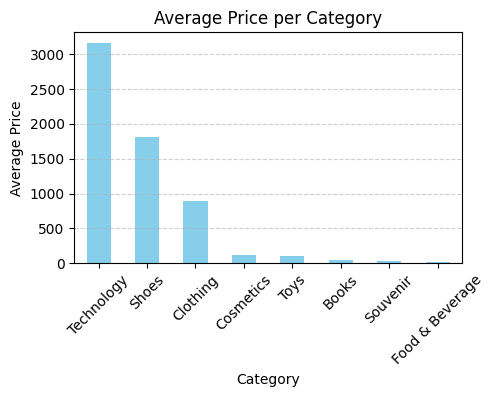

In [76]:
# Create a bar chart
plt.figure(figsize=(5, 3))
average_price_per_category.plot(kind='bar', color='skyblue')
plt.title("Average Price per Category")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### 11 Distribución de número de transacciones por grupos de edad y género

In [77]:
df4.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65...,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,50-64,242.40


In [78]:
# Agrupar por grupo de edad y género, luego contar transacciones
transaction_counts = df4.groupby(['age_cat', 'gender'])['invoice_no'].count().unstack()

# Imprimir el DataFrame resultante
print(transaction_counts)


gender   Female   Male
age_cat               
18-24      7938   5558
25-34     11474   7607
35-49     17355  11551
50-64     17080  11467
65...      5635   3792


In [79]:
# Calculate percentages
total_transactions = transaction_counts.sum(axis=1)
percentages = transaction_counts.div(total_transactions, axis=0) * 100

# Print percentages
print(percentages)




gender      Female       Male
age_cat                      
18-24    58.817427  41.182573
25-34    60.133117  39.866883
35-49    60.039438  39.960562
50-64    59.831156  40.168844
65...    59.775114  40.224886


In [80]:
# Prepare data for visualization (assuming percentages DataFrame is named 'percentages')

percentages_reset = percentages.reset_index()
age_groups = percentages_reset['age_cat'].tolist()
men_percentages = percentages_reset['Male'].tolist()
women_percentages = percentages_reset['Female'].tolist()



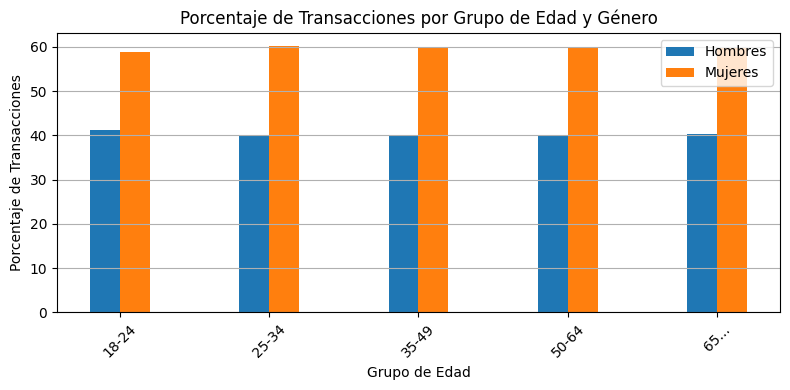

In [81]:
# Create stacked bar chart


plt.figure(figsize=(8, 4))
plt.bar(age_groups, men_percentages, label='Hombres', width=0.4, align='center')
plt.bar(age_groups, women_percentages, label='Mujeres', width=0.2, align='edge')
plt.xlabel('Grupo de Edad')
plt.ylabel('Porcentaje de Transacciones')
plt.title('Porcentaje de Transacciones por Grupo de Edad y Género')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### .12 ¿Cuánto gastó en total cada combinación de género y grupo de edad en diferentes categorías?

In [82]:
df5= df4.copy()

In [83]:
df5.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65...,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,50-64,242.40


In [84]:

# Group data by age_group, gender and category, then sum the amount spent in each category
total_spent_per_category = df5.groupby(['age_cat', 'gender', 'category'])['total'].sum().unstack()

# Print the result
print("Total gastado por cada combinación de género, grupo de edad y categoría:")
print(total_spent_per_category)


Total gastado por cada combinación de género, grupo de edad y categoría:
category            Books     Clothing   Cosmetics  Food & Beverage  \
age_cat gender                                                        
18-24   Female   69780.90   9212756.08   553423.26         68084.14   
        Male     51934.20   5998599.20   339145.06         49365.97   
25-34   Female   96626.70  13281240.72   789535.88         95165.08   
        Male     62069.55   8528873.76   514633.62         64852.00   
35-49   Female  140849.55  19776772.40  1170113.48        149368.80   
        Male     96035.85  13461588.80   814175.84         99689.03   
50-64   Female  135138.00  19593423.52  1150271.40        143877.30   
        Male    102701.85  13275239.12   803319.62        100405.54   
65...   Female   46919.55   6387502.88   403428.52         48827.28   
        Male     32496.75   4480794.56   254816.22         29899.91   

category              Shoes   Souvenir  Technology       Toys  
age_cat ge

<Figure size 1000x800 with 0 Axes>

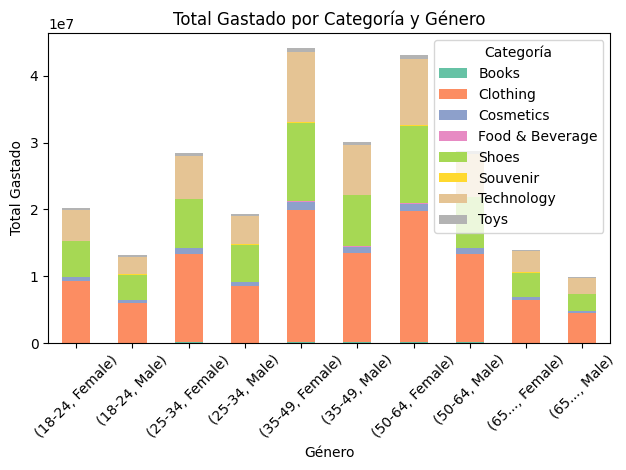

In [85]:

# Create a bar chart
plt.figure(figsize=(10, 8))
total_spent_per_category.plot(kind='bar', stacked=True, colormap='Set2')
plt.xlabel('Género')
plt.ylabel('Total Gastado')
plt.title('Total Gastado por Categoría y Género')
plt.legend(title='Categoría')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [92]:
# Agrupamos por categoría, género y edad, y calculamos la suma del total gastado
df_agrupado = df5.groupby(['category', 'gender', 'age_cat'])['total'].sum().reset_index()

print(df_agrupado)


   category  gender age_cat      total
0     Books  Female   18-24   69780.90
1     Books  Female   25-34   96626.70
2     Books  Female   35-49  140849.55
3     Books  Female   50-64  135138.00
4     Books  Female   65...   46919.55
..      ...     ...     ...        ...
75     Toys    Male   18-24  242206.72
76     Toys    Male   25-34  291200.00
77     Toys    Male   35-49  438681.60
78     Toys    Male   50-64  447928.32
79     Toys    Male   65...  144363.52

[80 rows x 4 columns]


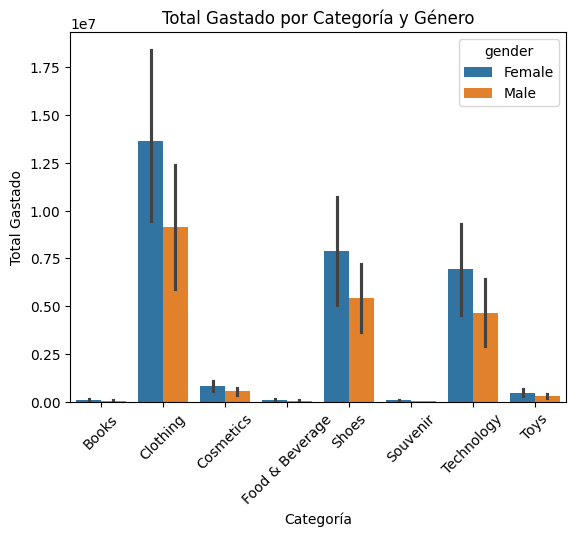

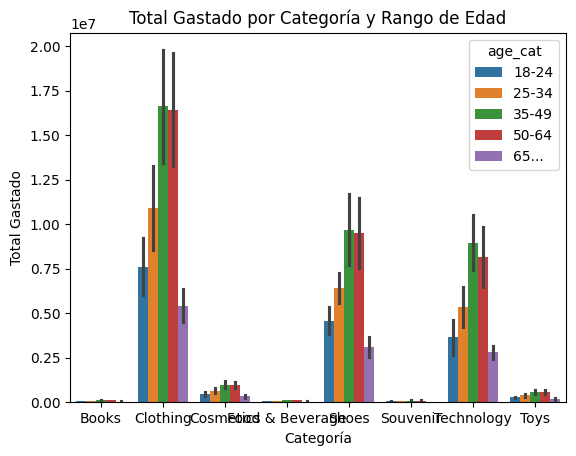

In [97]:
# Crear un gráfico de barras
sns.barplot(x='category', y='total', hue='gender', data=df_agrupado)
plt.title('Total Gastado por Categoría y Género')
plt.xlabel('Categoría')
plt.xticks(rotation=45)
plt.ylabel('Total Gastado')
plt.show()

sns.barplot(x='category', y='total', hue='age_cat', data=df_agrupado)
plt.title('Total Gastado por Categoría y Rango de Edad')
plt.xlabel('Categoría')
plt.ylabel('Total Gastado')
plt.show()

### .13 Los centros comerciales más populares por número de transacciones

In [100]:
df5.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65...,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,50-64,242.40


In [102]:
# Agrupar por tienda y contar las transacciones
conteo_transacciones = df5.groupby('shopping_mall')['invoice_no'].count().reset_index(name='Numero_Transacciones')

# Ordenar de mayor a menor por número de transacciones
conteo_transacciones = conteo_transacciones.sort_values('Numero_Transacciones', ascending=False)

# La primera fila será la tienda con más transacciones
tienda_mas_visitada = conteo_transacciones.iloc[0]['shopping_mall']


print( conteo_transacciones)
print("La tienda más visitada es:", tienda_mas_visitada)

       shopping_mall  Numero_Transacciones
5   Mall of Istanbul                 19943
4             Kanyon                 19823
6          Metrocity                 15011
7       Metropol AVM                 10161
3       Istinye Park                  9781
9       Zorlu Center                  5075
0        Cevahir AVM                  4991
2     Forum Istanbul                  4947
8     Viaport Outlet                  4914
1  Emaar Square Mall                  4811
La tienda más visitada es: Mall of Istanbul


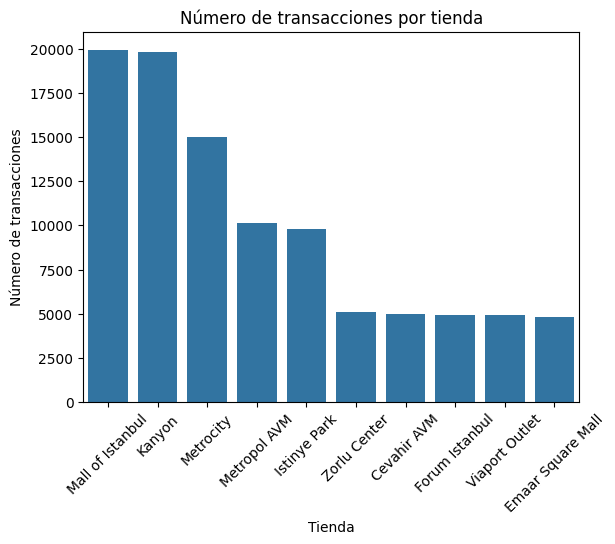

In [103]:
# Crear un gráfico de barras
sns.barplot(x='shopping_mall', y='Numero_Transacciones', data=conteo_transacciones)
plt.title('Número de transacciones por tienda')
plt.xlabel('Tienda')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si hay muchas tiendas
plt.show()

### .14 ¿En qué centro comercial se gasta más dinero?

In [105]:
# Agrupar por centro comercial y sumar los montos totales
gasto_total_por_cc = df5.groupby('shopping_mall')['total'].sum().reset_index(name='Gasto_Total')

# Ordenar de mayor a menor por gasto total
gasto_total_por_cc = gasto_total_por_cc.sort_values('Gasto_Total', ascending=False)

# El primer registro será el centro comercial con mayor gasto
centro_comercial_mas_gasto = gasto_total_por_cc.iloc[0]['shopping_mall']

print(gasto_total_por_cc)
print("El centro comercial donde se gasta más dinero es:", centro_comercial_mas_gasto)

       shopping_mall  Gasto_Total
5   Mall of Istanbul  50872481.68
4             Kanyon  50554231.10
6          Metrocity  37302787.33
7       Metropol AVM  25379913.19
3       Istinye Park  24618827.68
9       Zorlu Center  12901053.82
0        Cevahir AVM  12645138.20
8     Viaport Outlet  12521339.72
1  Emaar Square Mall  12406100.29
2     Forum Istanbul  12303921.24
El centro comercial donde se gasta más dinero es: Mall of Istanbul


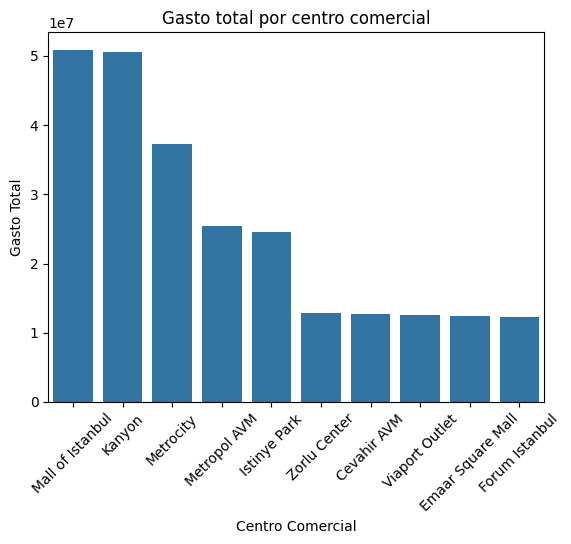

In [108]:
# Crear un gráfico de barras
sns.barplot(x='shopping_mall', y='Gasto_Total', data=gasto_total_por_cc)
plt.title('Gasto total por centro comercial')
plt.xlabel('Centro Comercial')
plt.ylabel('Gasto Total')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si hay muchos centros comerciales
plt.show()

### .15 Total gastado por mes entre 2021-2023

In [109]:
df6= df5.copy()

In [117]:
df6.head(20)


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65...,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,50-64,242.40
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,2022,5,Forum Istanbul,25-34,7502.00
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,2022,3,Istinye Park,35-49,40.66
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,2021,1,Mall of Istanbul,25-34,1200.32
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-11-04,2021,11,Metrocity,65...,2700.72
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,2021-08-22,2021,8,Kanyon,50-64,1200.32


In [112]:
# Filtrar los datos entre 2021 y 2023
df_filtered = df6[(df6['invoice_date'] >= '2021-01-01') & (df6['invoice_date'] <= '2023-12-31')]

# Agrupar por mes y calcular la suma de los montos
gastos_por_mes = df_filtered.groupby(pd.Grouper(key='invoice_date', freq='M'))['total'].sum()

print(gastos_por_mes)

invoice_date
2021-01-31     9641614.62
2021-02-28     8772315.22
2021-03-31     9455359.38
2021-04-30     9389541.54
2021-05-31     9771756.97
2021-06-30     9286271.35
2021-07-31    10311119.68
2021-08-31     9630655.70
2021-09-30     9188165.62
2021-10-31    10263015.06
2021-11-30     9265555.29
2021-12-31     9585200.16
2022-01-31     9764311.14
2022-02-28     8344111.92
2022-03-31     9986685.16
2022-04-30     9326144.44
2022-05-31     9947574.13
2022-06-30     9647503.95
2022-07-31    10067602.95
2022-08-31     9651705.59
2022-09-30     9607629.29
2022-10-31    10282075.37
2022-11-30     8941584.66
2022-12-31     9869885.48
2023-01-31     9485599.83
2023-02-28     9508662.96
2023-03-31     2514146.79
Freq: ME, Name: total, dtype: float64


C:\Users\CarmenLu\AppData\Local\Temp\ipykernel_12912\3442486559.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gastos_por_mes = df_filtered.groupby(pd.Grouper(key='invoice_date', freq='M'))['total'].sum()


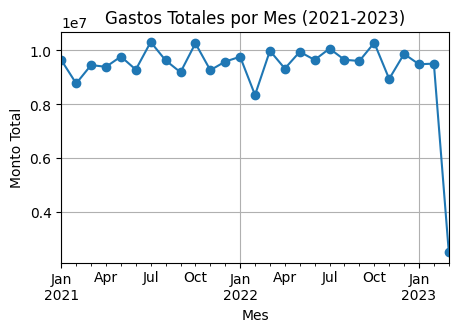

In [114]:
# Crear el gráfico de línea
plt.figure(figsize=(5, 3))
gastos_por_mes.plot(kind='line', marker='o')
plt.title('Gastos Totales por Mes (2021-2023)')
plt.xlabel('Mes')
plt.ylabel('Monto Total')
plt.grid(True)
plt.show()